# Assignment 2 - Feature Manipulation

Class: COMP 5970 - Computer Vision

Author: Chris Hinkson

Email: cmh0201@auburn.edu

*Personal Contribution Statement: This was an individual project and I did everything in it.*

*Generative AI Declaration: ChatGPT was used to explain package syntax and to see examples of how to use package syntax (specifically: cv2, ipywidget, and matplotlib syntax). All code provided here is written by myself with some inspiration from Dr. Aakur's class examples and the examples generated by ChatGPT.*

Assignment Table Of Contents:
1) [Module Import/Config](#module-import--config)
2) [Resource Download](#resource-download)
3) [Task 1 Report](#task-1-report)
4) [Task 2 Report](#task-2-report)

#### Module Import / Config

The below code cell will import any needed modules for assignment 2 and configure them as necessary.

In [40]:
# System
import os
import requests
from tqdm import tqdm
from enum import Enum
from warnings import warn

# Data
import numpy as np

# Image Processing
import cv2

# Display
from IPython.display import display, clear_output
from ipywidgets import interact, FloatSlider, SelectionSlider, Button
import matplotlib.pyplot as plt

#### Resource Download

The below code cell will download any needed resources (images) for assignment 2.

In [41]:

# Create image directory if it does not exist
os.makedirs("../images", exist_ok=True)

# Define image names for this project
imageNames = ["auburn.jpeg", "Part1_scene.png", "puzzle_reference.png", "puzzle_scrambled.png"]
for imageName in tqdm(iterable=imageNames, desc="Downloading Images", unit="image"):
	if not os.path.exists(f"../images/{imageName}"):
		response = requests.get(f"https://github.com/cmh02/COMP5970---Computer-Vision/blob/main/Assignment%202%20-%20Feature%20Manipulation/images/{imageName}?raw=true")
		with open(f"../images/{imageName}", "wb") as imageFile:
			imageFile.write(response.content)
		print(f"-> Saved {imageName} to ../images/{imageName}!")
	else:
		print(f"-> File {imageName} already exists!")



-> File auburn.jpeg already exists!
-> File Part1_scene.png already exists!
-> File puzzle_reference.png already exists!
-> File puzzle_scrambled.png already exists!


## Task 1 Report: 

Description

Task 1 Report Table of Contents:
1. [Approach Strategy](#task-1-approach-strategy)
2. [Implementation Details](#task-1-implementation)
3. [Dependencies and Runtime Instructions](#task-1-dependencies-and-runtime-instructions)
4. [Results](#task-1-results)

### Task 1 Approach Strategy

My approach strategy for Task 1 was to 

### Task 1 Implementation

The first step of my implementation was to 

### Task 1 Dependencies and Runtime Instructions

For Task 1, there are several dependencies required for the program:
1) 

Two files are needed to successfully run the below code cells. These files are automatically downloaded from my github to ensure that they are available:
1) 

To run the program, you 

### Task 1 Results




#### Image Loading and Preparation

This code cell will load the two images and prepare them for the rest of the task.

In [42]:
# Load
image_auburn = cv2.imread("../images/auburn.jpeg")
image_scene = cv2.imread("../images/Part1_scene.png")

# Convert the images to grayscale
imageGray_auburn = cv2.cvtColor(src=image_auburn, code=cv2.COLOR_BGR2GRAY)
imageGray_scene = cv2.cvtColor(src=image_scene, code=cv2.COLOR_BGR2GRAY)

# Convert the images to RGB
imageRGB_auburn = cv2.cvtColor(src=image_auburn, code=cv2.COLOR_BGR2RGB)
imageRGB_scene = cv2.cvtColor(src=image_scene, code=cv2.COLOR_BGR2RGB)

# Get image dimensions
imageHeight_auburn, imageWidth_auburn, imageDepth_auburn = image_auburn.shape
imageHeight_scene, imageWidth_scene, imageDepth_scene = image_scene.shape

#### Sift Keypoint Detection

This code cell will use SIFT (via cv2) for keypoint detection.

References:
1. Dr. Aaukur's Class Demo Notebook
2. [CV2 Sift Tutorial](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)

(np.float64(-0.5), np.float64(793.5), np.float64(535.5), np.float64(-0.5))

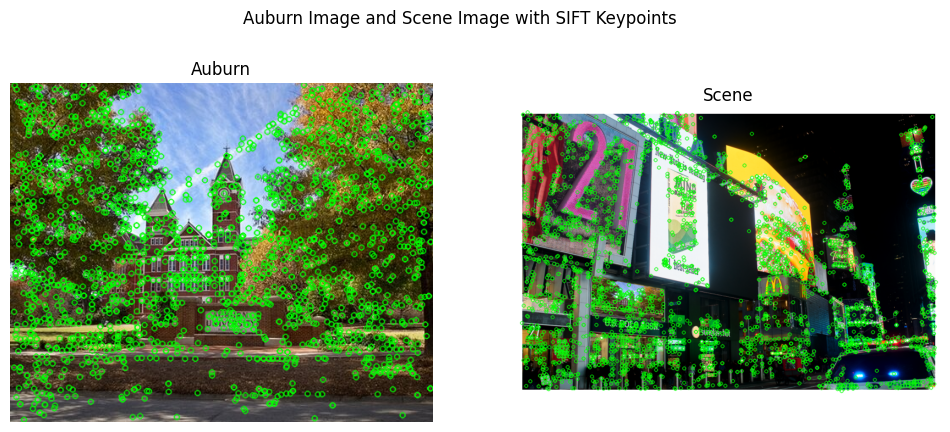

In [43]:
# Create sift for keypoint detection and descriptor extraction
sift = cv2.SIFT_create()
keypoints_auburn, descriptors_auburn = sift.detectAndCompute(imageGray_auburn, None)
keypoints_scene, descriptors_scene = sift.detectAndCompute(imageGray_scene, None)

# Draw keypoints on the images for display
image_withKeypoints_auburn = cv2.drawKeypoints(image=image_auburn, keypoints=keypoints_auburn, outImage=None, color=(0, 255, 0))
image_withKeypoints_scene = cv2.drawKeypoints(image=image_scene, keypoints=keypoints_scene, outImage=None, color=(0, 255, 0))
imageGray_withKeypoints_auburn = cv2.drawKeypoints(image=imageGray_auburn, keypoints=keypoints_auburn, outImage=None, color=(0, 255, 0))
imageGray_withKeypoints_scene = cv2.drawKeypoints(image=imageGray_scene, keypoints=keypoints_scene, outImage=None, color=(0, 255, 0))
imageRGB_withKeypoints_auburn = cv2.drawKeypoints(image=imageRGB_auburn, keypoints=keypoints_auburn, outImage=None, color=(0, 255, 0))
imageRGB_withKeypoints_scene = cv2.drawKeypoints(image=imageRGB_scene, keypoints=keypoints_scene, outImage=None, color=(0, 255, 0))

# Create plot and display the RGB images with keypoints
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Auburn Image and Scene Image with SIFT Keypoints")
ax1.imshow(imageRGB_withKeypoints_auburn)
ax2.imshow(imageRGB_withKeypoints_scene)
ax1.set_title("Auburn")
ax2.set_title("Scene")
ax1.axis("off")
ax2.axis("off")



#### FLANN Keypoint Matching

This code cell will use FLANN to match the keypoints.

References:
1. Dr. Aaukur's Class Demo Notebook
2. [CV2 FLANN Tutorial](https://docs.opencv.org/3.4/d5/d6f/tutorial_feature_flann_matcher.html)

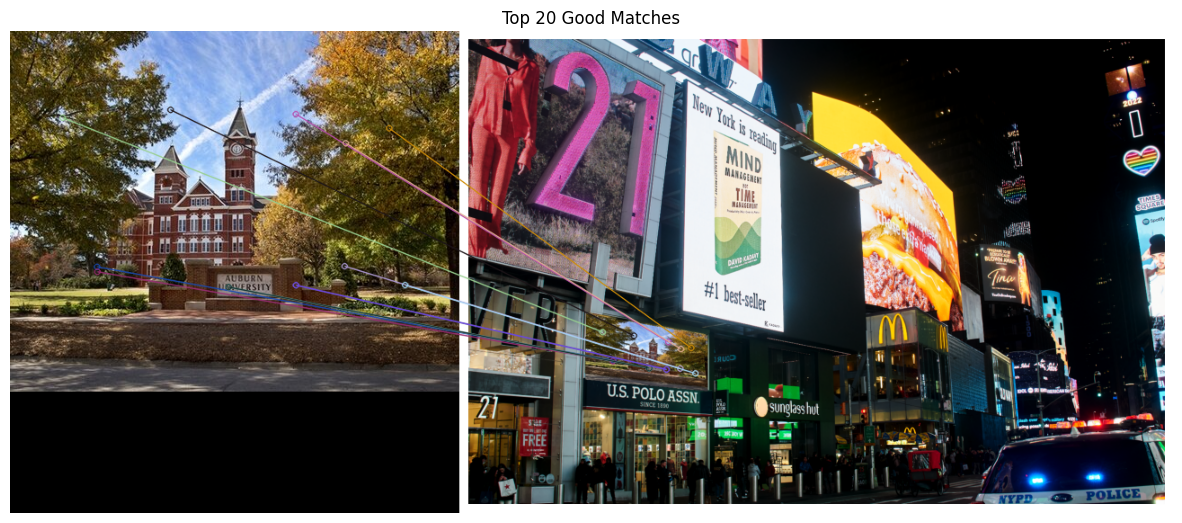

In [44]:
# Get index and search parameters
FLANN_INDEX_KDTREE = 1
indexParameters = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
searchParameters = dict(checks=50)

# Create FLANN matcher and get matches for auburn and scene images
flannMatcher = cv2.FlannBasedMatcher(indexParameters, searchParameters) # type: ignore
matches = flannMatcher.knnMatch(descriptors_auburn, descriptors_scene, k=2)

# Peform Lowe's ratio test to find good matches at the threshold
loweRatioThreshold = 0.65
goodMatchesFound = []
for bestMatch, secondBestMatch in matches:
    
    # If the best match is better than second best then its a good match
    if bestMatch.distance < loweRatioThreshold * secondBestMatch.distance:
        goodMatchesFound.append(bestMatch)

# Draw matches and display
img_matches = cv2.drawMatches(
	img1=imageRGB_auburn, 
	keypoints1=keypoints_auburn, 
	img2=imageRGB_scene, 
	keypoints2=keypoints_scene, 
	matches1to2=goodMatchesFound[:20], 
	outImg=None, 
	flags=2
    )
plt.figure(figsize=(15, 10))
plt.title("Top 20 Good Matches")
plt.imshow(img_matches)
plt.axis('off')
plt.show()

#### Homography Estimation with RANSCAC

This code cell will estimate hopography with RANSAC to find the matrix for mapping the perspective transformation.

References:
1. Dr. Aaukur's Class Demo Notebook
2. [CV2 Homography Tutorial](https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html)

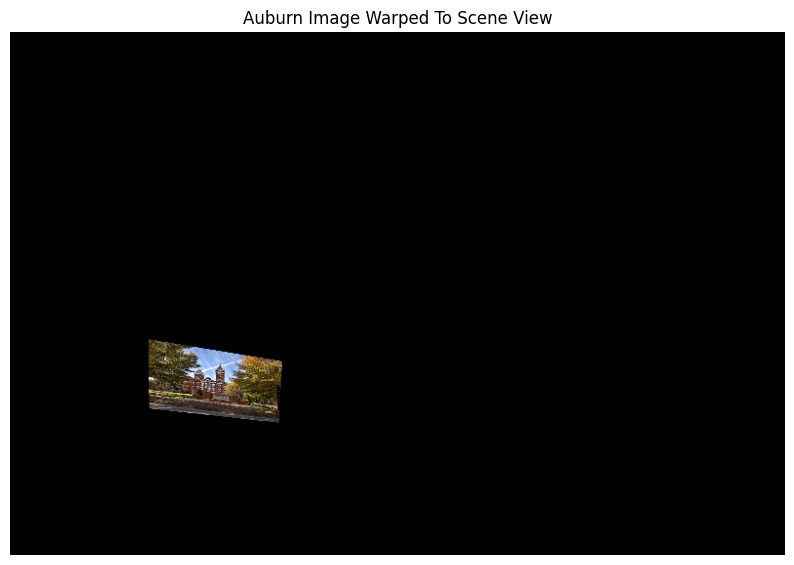

In [47]:
# Make sure we have enough matches
if len(goodMatchesFound) <= 10:
    raise Exception("Not enough good matches were produced to estimate homography!")

# Get locations in the auburn image and scene image
imagePoints_auburn = np.float32([kp1[m.queryIdx].pt for m in goodMatchesFound]).reshape(-1, 1, 2) # type: ignore
imagePoints_scene = np.float32([kp2[m.trainIdx].pt for m in goodMatchesFound]).reshape(-1, 1, 2) # type: ignore

# Estimate homography using RANSAC
homographyMatrix, mask = cv2.findHomography(srcPoints=imagePoints_auburn, dstPoints=imagePoints_scene, method=cv2.RANSAC, ransacReprojThreshold=5.0)
image_warped_auburn = cv2.warpPerspective(imageRGB_auburn, homographyMatrix, (imageWidth_scene, imageHeight_scene))

# Show the warped image
plt.figure(figsize=(10, 10))
plt.title("Auburn Image Warped To Scene View")
plt.imshow(image_warped_auburn)
plt.axis('off')
plt.show()

#### Perspective Transformation With Bounding Box

This code cell will do the perspective transformation to put a bounding box in the scene around the auburn image.

References:
1. Dr. Aaukur's Class Demo Notebook

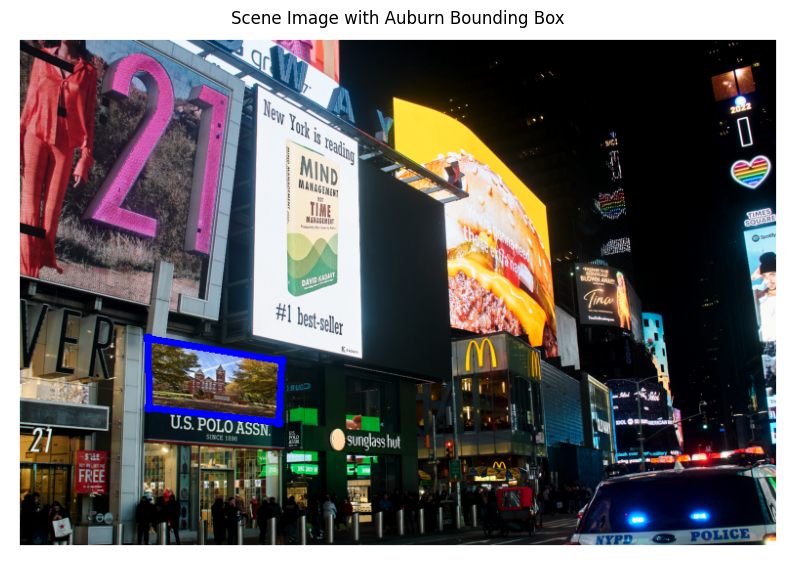

In [57]:
# Get the corners from the auburn image
imageCorners_normal_auburn = np.float32([[0, 0], [imageWidth_auburn, 0], [imageWidth_auburn, imageHeight_auburn], [0, imageHeight_auburn]]) # type: ignore

# Transform the corners to the scene using the homography
imageCorners_transformed_auburn = cv2.perspectiveTransform(src=imageCorners_normal_auburn.reshape(-1, 1, 2), m=homographyMatrix, dst=None) # type: ignore

# Draw the bounding box on the scene image
image_withBoundingBox_scene = cv2.polylines(img=imageRGB_scene.copy(), pts=[np.int32(imageCorners_transformed_auburn)], isClosed=True, color=(0, 0, 255), thickness=5) # type: ignore

# Show the scene image with bounding box
plt.figure(figsize=(10, 10))
plt.title("Scene Image with Auburn Bounding Box")
plt.imshow(image_withBoundingBox_scene)
plt.axis('off')
plt.show()

## Task 2 Report: 

Description

Task 2 Report Table of Contents:
1. [Approach Strategy](#task-2-approach-strategy)
2. [Implementation Details](#task-2-implementation)
3. [Dependencies and Runtime Instructions](#task-2-dependencies-and-runtime-instructions)
4. [Results](#task-2-results)

### Task 2 Approach Strategy

My approach strategy for Task 2 was to 

### Task 2 Implementation

The first step of my implementation was to 

### Task 2 Dependencies and Runtime Instructions

For Task 2, there are several dependencies required for the program:
1) 

Two files are needed to successfully run the below code cells. These files are automatically downloaded from my github to ensure that they are available:
1) 

To run the program, you 

### Task 2 Results

